In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chat13/_chat.txt
/kaggle/input/chat12/chat12.txt


In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    #line = line[1:]
    #splitline = line.split("]")
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(",")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [5]:
conversation1 = '27/01/2020, 9:42 pm - +91 95949 08570: Are you really thinking of just  printing the pattern'
getDatapoint(conversation1)

('27/01/2020',
 ' 9:42 pm',
 '+91 95949 08570',
 'Are you really thinking of just  printing the pattern')

In [6]:
data = []
conversation = '../input/chat12/chat12.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getDatapoint(line)
                messageBuffer.append(message)
        else:
            messageBuffer.append(line)


In [7]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(20))
print(df.info())
print(df.Author.unique())

         Date       Time                      Author  \
0         NaT       None                        None   
1  2020-01-27    7:59 pm             +91 95949 08570   
2  2020-01-27    8:02 pm                        None   
3  2020-01-27    8:16 pm                        None   
4  2020-01-27    9:34 pm                        None   
5  2020-01-27   10:03 pm                        None   
6  2020-01-27    8:37 pm             +91 96536 93868   
7  2020-01-27   10:05 pm                        None   
8  2020-01-27    8:39 pm  Dheeraj Lalwani (TSEC, CS)   
9  2020-01-27    8:41 pm  Dheeraj Lalwani (TSEC, CS)   
10 2020-01-27    9:19 pm             +91 79778 76844   
11 2020-01-27    9:19 pm             +91 90499 38860   
12 2020-01-27    9:41 pm     Tanay Kamath (TSEC, CS)   
13 2020-01-27    9:42 pm             +91 95949 08570   
14 2020-01-27    9:42 pm     Tanay Kamath (TSEC, CS)   
15 2020-01-27    9:42 pm     Tanay Kamath (TSEC, CS)   
16 2020-01-27    9:42 pm             +91 95949 0

In [8]:
total_messages = df.shape[0]
total_messages

13533

In [9]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)
df["Message"][0:5]

686


0      So that we can build our problem solving skills
1                                          Nice idea 🤟
2    +91 89833 85127 joined using this group's invi...
3    +91 99696 99151 joined using this group's invi...
4    +91 98206 14506 joined using this group's invi...
Name: Message, dtype: object

In [10]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)


0


In [11]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df['Message'].apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)
print(len(df['urlcount']))

Chats between Aman and Sapna
Total Messages:  13533
Number of Media Shared:  686
Number of Emojis Shared 0
Number of Links Shared 766
13533


In [12]:
#df[df["Author"]=="Tanay Kamath"]
#df[df["Author"]=="Dheeraj Lalwani"]

The whatsapp conversation (chat history) used here is between two Indians.Though there are many sentences(messages) in english language,there are messages that were sent in hindi language as well.So to consider the count of all the words in chat history to be in reasonable number,we are not considering the messages of a particular author(To take the count of as many dictionary words as possible).

For further purposes , if required the messages of particular author(person) can be filtered using the comments mentioned above 

In [13]:
print(len(df["Message"]))
df['Words_in_each_line'] = df["Message"].apply(lambda s : s.split(' '))
df['Words_in_each_line']

13533


0        [So, that, we, can, build, our, problem, solvi...
1                                          [Nice, idea, 🤟]
2        [+91, 89833, 85127, joined, using, this, group...
3        [+91, 99696, 99151, joined, using, this, group...
4        [+91, 98206, 14506, joined, using, this, group...
                               ...                        
13528                                          ins, ig]
13529                                   [MCQs, mark, kiya]
13530                                    [Sign-in, kiya😂😅]
13531                                 [Incognito, se, na?]
13532                                                [Yup]
Name: Words_in_each_line, Length: 13533, dtype: object

In [14]:
tokenized_sentences = df['Words_in_each_line']
tokenized_sentences_0_to_5 = df['Words_in_each_line'][0:5]
print(tokenized_sentences_0_to_5)

0    [So, that, we, can, build, our, problem, solvi...
1                                      [Nice, idea, 🤟]
2    [+91, 89833, 85127, joined, using, this, group...
3    [+91, 99696, 99151, joined, using, this, group...
4    [+91, 98206, 14506, joined, using, this, group...
Name: Words_in_each_line, dtype: object


In [15]:
def word_count(sentence):
           
    count = {}
   
    for sentence in tokenized_sentences: 
   
         for word in sentence: 


            if word not in count.keys(): 
                count[word] = 1
            
            else:
                count[word] += 1

    ### END CODE HERE ###
    
    return count

In [16]:
count_dict = word_count(tokenized_sentences)


In [17]:
#Example:
print("The word 'So' is used by the user(tanay kamath) for {} times".format(count_dict["So"]))

The word 'So' is used by the user(tanay kamath) for 111 times


In [18]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Tanay Kamath (TSEC, CS)", "Dheeraj Lalwani (TSEC, CS)"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)


Stats of Tanay Kamath (TSEC, CS) -
Messages Sent 2284
Average Words per message 5.330122591943958
Media Messages Sent 124
Emojis Sent 0
Links Sent 20
Stats of Dheeraj Lalwani (TSEC, CS) -
Messages Sent 1732
Average Words per message 6.596997690531178
Media Messages Sent 116
Emojis Sent 0
Links Sent 20


There are 641330 words in all the messages.
{"what's", 'could', "let's", "that's", 'as', 'which', 'most', "he'd", 'if', "she'll", "isn't", 'than', 'therefore', 'why', 'into', 'she', "we've", "didn't", 'who', 'just', 'not', 'each', 'again', 'like', 'r', 'there', 'since', 'com', 'so', 'with', 'to', 'me', 'hers', "he's", "i'd", "mustn't", "they're", "couldn't", 'having', 'or', 'up', 'while', "hasn't", 'over', 'k', 'ever', 'also', "they'd", "who's", "won't", 'off', 'during', 'is', "wasn't", "i'll", 'because', 'out', "here's", "i'm", 'your', "it's", 'www', 'otherwise', 'being', "we'd", 'further', 'he', 'this', "she's", "haven't", "don't", 'yourself', 'ours', 'of', 'are', 'can', 'until', 'i', 'such', "he'll", 'else', 'his', "they've", 'http', "hadn't", 'him', 'those', 'get', 'you', 'her', 'whom', 'own', 'under', 'their', 'our', 'from', 'has', "why's", 'below', 'ought', "you've", 'some', "we're", 'against', "where's", "doesn't", 'few', 'before', 'do', 'once', 'any', 'down', 'between', 'where'

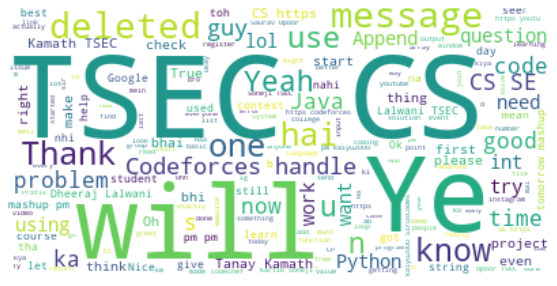

In [19]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

print(stopwords)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
#Commonly used words.
stopwords = set(STOPWORDS)
common_words = list(stopwords)
common_words[0:5]

["what's", 'could', "let's", "that's", 'as']

In [21]:
test_sentence = "30/05/2022, 4:45 pm - +91 98493 5746: Hey! we're here. Also few people are staying over there. "
date, time, author, message = getDatapoint(test_sentence)
print(message)

Hey! we're here. Also few people are staying over there. 


Let us consider the user is typing a word..(which is considered as input here).Let the word be "Also"

In [22]:
import nltk
sentence = message.lower()
tokenized = nltk.word_tokenize(sentence)

In [23]:
import re
filtered_message = re.sub(r"[^a-zA-Z0-9]"," ",message)
print(filtered_message)
import nltk
sentence = filtered_message.lower()
tokenized_message = nltk.word_tokenize(sentence)
#tokenized_message = filtered_message.split('')
print(tokenized)

Hey  we re here  Also few people are staying over there  
['hey', '!', 'we', "'re", 'here', '.', 'also', 'few', 'people', 'are', 'staying', 'over', 'there', '.']


In [24]:
from nltk.corpus import wordnet
Input_word = "Also"
if Input_word in count_dict.keys():
    
    word_count = count_dict[Input_word]

print("This word is used by the user for {} times.These are the other alternate words which could be used by the user instead. ".format(count_dict[Input_word]))
if Input_word not in common_words:
    if word_count>20:
        synonyms = []
    for syn in wordnet.synsets(Input_word):
        for lm in syn.lemmas():
             synonyms.append(lm.name())#adding into synonyms
        print (set(synonyms))

This word is used by the user for 34 times.These are the other alternate words which could be used by the user instead. 
{'also', 'besides', 'likewise', 'too', 'as_well'}


**CONCLUSION**:

This project is titled as "AUTO SYNONYM SUGGESTION USING OWN WHATSAPP CHAT" that helps the user to explore more words through auto word suggestions while having a conversation that actually takes the input of a whatsapp chat of that particular user only. It estimates the count of how many times each word is being used by the user and suggests synonyms for the words which are repetitively used.Using this feature in  any application the user will be able to improve his vocabulary skills. 